In [1]:


%matplotlib inline
from copy import deepcopy
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from matplotlib import pyplot as plt
#plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
%matplotlib inline
from copy import deepcopy
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
# Importing the dataset

#http://eneskemalergin.github.io/blog//blog/Fuzzy_Clustering/



In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [3]:
file = pd.read_csv('BSOM_DataSet_revised.csv')
data=file[['all_NBME_avg_n4', 'all_PIs_avg_n131', 'HD_final']]


print(data.shape)
data.head()



(115, 3)


,all_NBME_avg_n4,all_PIs_avg_n131,HD_final
0,0.7700,0.6623,0.95
1,0.8000,0.6107,0.84
2,0.8125,0.6798,0.88
3,0.9250,0.7652,0.91
4,0.8550,0.6772,0.83


Text(0.5,0,'HD_final')

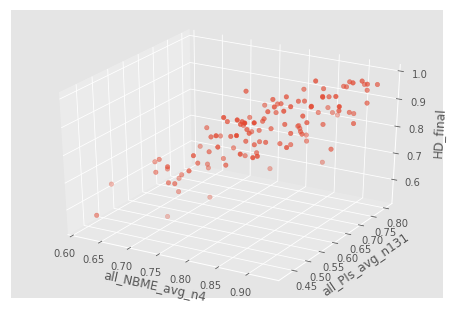

In [4]:
# Getting the values and plotting it
f1 = data['all_NBME_avg_n4'].values
f2 = data['all_PIs_avg_n131'].values
f3 = data['HD_final'].values
X = np.array(list(zip(f1, f2,f3)))
#plt.scatter(f1, f2, c='black', s=7)
fig = plt.figure()

ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

ax.set_xlabel('all_NBME_avg_n4')
ax.set_ylabel('all_PIs_avg_n131')
ax.set_zlabel('HD_final')

In [5]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [6]:

# Number of clusters
k = 3

clust_random = data.sample(n=3)
# X coordinates of random centroids
C_x = np.array(clust_random.iloc[0,:])
print(type(C_x))
# Y coordinates of random centroids
C_y = np.array(clust_random.iloc[1,:])
C_z = np.array(clust_random.iloc[2,:])
C = np.array(list(zip(C_x, C_y,C_z)), dtype=np.float32)
print('The randomly intialized clusters are :',C)

<class 'numpy.ndarray'>
The randomly intialized clusters are : [[0.815  0.905  0.795 ]
 [0.5633 0.7548 0.6134]
 [0.91   0.98   0.85  ]]


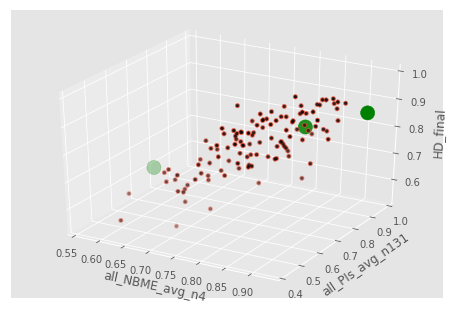

In [7]:

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])


# Plotting along with the Centroids
ax.scatter(f1, f2,f3, c='#050505', s=7)
ax.set_xlabel('all_NBME_avg_n4')
ax.set_ylabel('all_PIs_avg_n131')
ax.set_zlabel('HD_final')

ax.scatter(C_x, C_y,C_z ,marker='o', s=200, c='g')


points [array([0.77  , 0.6623, 0.95  ]), array([0.8   , 0.6107, 0.84  ]), array([0.8125, 0.6798, 0.88  ]), array([0.925 , 0.7652, 0.91  ]), array([0.855 , 0.6772, 0.83  ]), array([0.775 , 0.6431, 0.84  ]), array([0.7925, 0.5844, 0.9   ]), array([0.875 , 0.7352, 0.93  ]), array([0.8525, 0.6467, 0.84  ]), array([0.81  , 0.5585, 0.8   ]), array([0.8875, 0.7719, 0.95  ]), array([0.79  , 0.6179, 0.75  ]), array([0.88, 0.7 , 0.95]), array([0.7775, 0.5933, 0.83  ]), array([0.795 , 0.6096, 0.81  ]), array([0.84  , 0.7039, 0.83  ]), array([0.8375, 0.653 , 0.91  ]), array([0.8175, 0.6864, 0.91  ]), array([0.81 , 0.673, 0.93 ]), array([0.8475, 0.7063, 0.92  ]), array([0.895 , 0.7147, 0.95  ]), array([0.8475, 0.6588, 0.79  ]), array([0.86  , 0.7453, 0.92  ]), array([0.77  , 0.5578, 0.85  ]), array([0.84  , 0.7004, 0.92  ]), array([0.745 , 0.6245, 0.8   ]), array([0.86  , 0.7175, 0.99  ]), array([0.8375, 0.6576, 0.86  ]), array([0.77  , 0.6186, 0.77  ]), array([0.86  , 0.6161, 0.81  ]), array([0.76

points [array([0.77  , 0.6623, 0.95  ]), array([0.8   , 0.6107, 0.84  ]), array([0.8125, 0.6798, 0.88  ]), array([0.855 , 0.6772, 0.83  ]), array([0.775 , 0.6431, 0.84  ]), array([0.7925, 0.5844, 0.9   ]), array([0.8525, 0.6467, 0.84  ]), array([0.81  , 0.5585, 0.8   ]), array([0.7775, 0.5933, 0.83  ]), array([0.795 , 0.6096, 0.81  ]), array([0.84  , 0.7039, 0.83  ]), array([0.8375, 0.653 , 0.91  ]), array([0.8175, 0.6864, 0.91  ]), array([0.81 , 0.673, 0.93 ]), array([0.8475, 0.6588, 0.79  ]), array([0.77  , 0.5578, 0.85  ]), array([0.745 , 0.6245, 0.8   ]), array([0.8375, 0.6576, 0.86  ]), array([0.86  , 0.6161, 0.81  ]), array([0.765 , 0.6073, 0.87  ]), array([0.83  , 0.5764, 0.79  ]), array([0.8075, 0.6134, 0.8   ]), array([0.805 , 0.6529, 0.87  ]), array([0.8   , 0.6463, 0.83  ]), array([0.7875, 0.6463, 0.82  ]), array([0.8475, 0.6914, 0.83  ]), array([0.8075, 0.6957, 0.9   ]), array([0.8075, 0.6321, 0.8   ]), array([0.8425, 0.6669, 0.92  ]), array([0.8275, 0.5658, 0.79  ]), array

points [array([0.715 , 0.5491, 0.69  ]), array([0.74 , 0.555, 0.74 ]), array([0.74  , 0.5915, 0.7   ]), array([0.615 , 0.5038, 0.64  ]), array([0.7125, 0.5423, 0.63  ]), array([0.74  , 0.5248, 0.73  ]), array([0.7   , 0.5272, 0.54  ]), array([0.71  , 0.5136, 0.68  ]), array([0.71 , 0.512, 0.74 ]), array([0.7075, 0.5545, 0.67  ]), array([0.7475, 0.5793, 0.77  ]), array([0.67  , 0.5471, 0.72  ]), array([0.7625, 0.5984, 0.74  ]), array([0.63  , 0.4248, 0.58  ]), array([0.6825, 0.5253, 0.7   ]), array([0.7425, 0.5356, 0.78  ]), array([0.78  , 0.5706, 0.74  ]), array([0.7175, 0.609 , 0.76  ]), array([0.7475, 0.5808, 0.6   ]), array([0.69  , 0.5502, 0.7   ]), array([0.72  , 0.5154, 0.68  ]), array([0.7425, 0.5835, 0.72  ]), array([0.6825, 0.5377, 0.74  ])]
 C[i] [0.6511087 0.6511087 0.6511087]
points [array([0.925 , 0.7652, 0.91  ]), array([0.875 , 0.7352, 0.93  ]), array([0.8875, 0.7719, 0.95  ]), array([0.88, 0.7 , 0.95]), array([0.8175, 0.6864, 0.91  ]), array([0.81 , 0.673, 0.93 ]), arra

C:\Users\Bhavya N\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


error 0.002357465
points [array([0.77  , 0.6623, 0.95  ]), array([0.8   , 0.6107, 0.84  ]), array([0.8125, 0.6798, 0.88  ]), array([0.855 , 0.6772, 0.83  ]), array([0.775 , 0.6431, 0.84  ]), array([0.7925, 0.5844, 0.9   ]), array([0.8525, 0.6467, 0.84  ]), array([0.81  , 0.5585, 0.8   ]), array([0.79  , 0.6179, 0.75  ]), array([0.7775, 0.5933, 0.83  ]), array([0.795 , 0.6096, 0.81  ]), array([0.84  , 0.7039, 0.83  ]), array([0.8375, 0.653 , 0.91  ]), array([0.8475, 0.6588, 0.79  ]), array([0.77  , 0.5578, 0.85  ]), array([0.745 , 0.6245, 0.8   ]), array([0.8375, 0.6576, 0.86  ]), array([0.77  , 0.6186, 0.77  ]), array([0.86  , 0.6161, 0.81  ]), array([0.765 , 0.6073, 0.87  ]), array([0.83  , 0.5764, 0.79  ]), array([0.8075, 0.6134, 0.8   ]), array([0.805 , 0.6529, 0.87  ]), array([0.8   , 0.6463, 0.83  ]), array([0.7875, 0.6463, 0.82  ]), array([0.8475, 0.6914, 0.83  ]), array([0.815 , 0.6551, 0.69  ]), array([0.8075, 0.6957, 0.9   ]), array([0.8075, 0.6321, 0.8   ]), array([0.8275, 0.

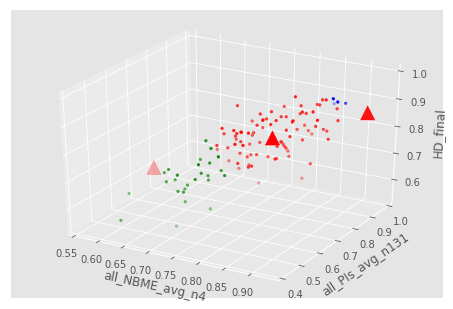

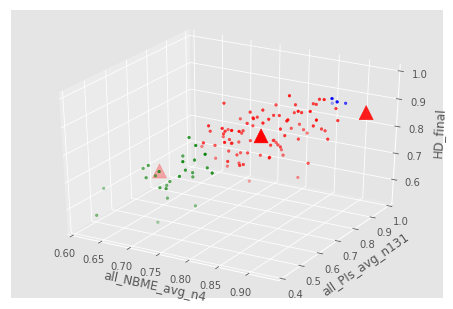

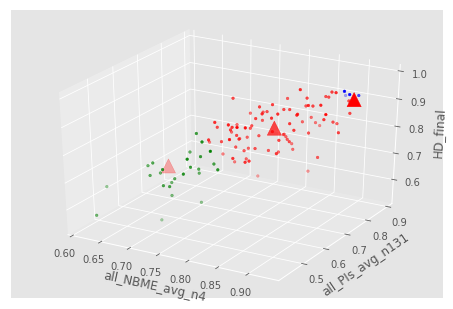

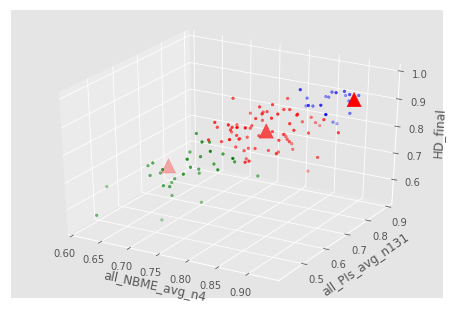

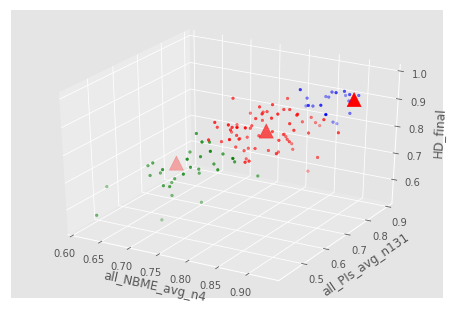

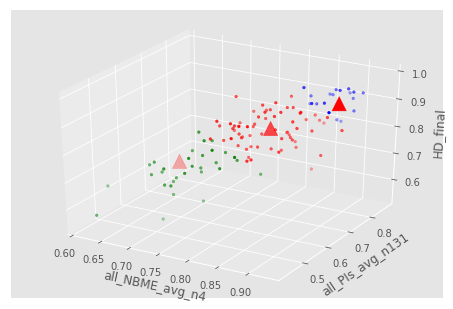

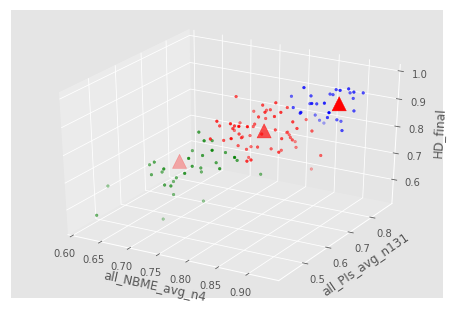

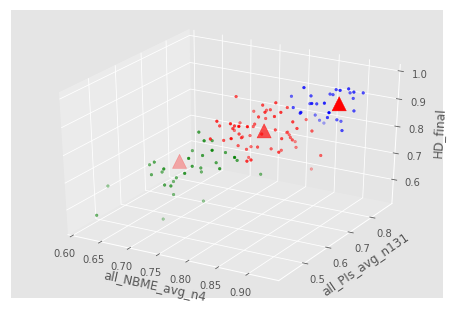

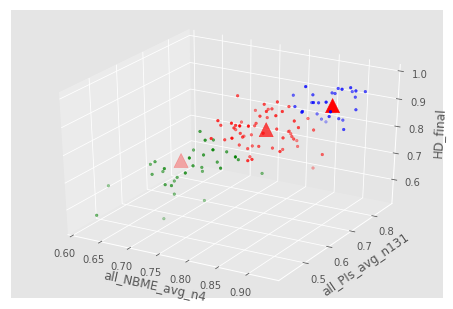

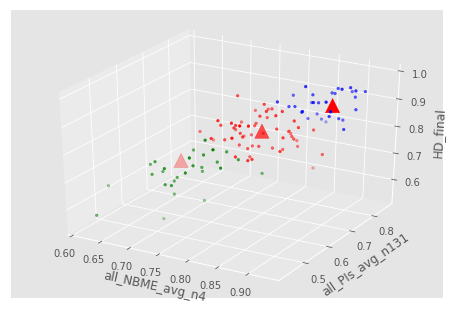

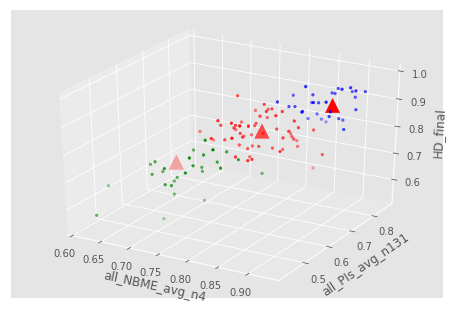

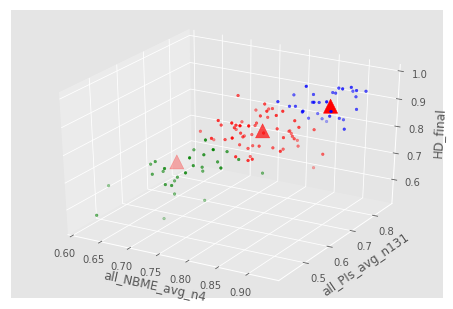

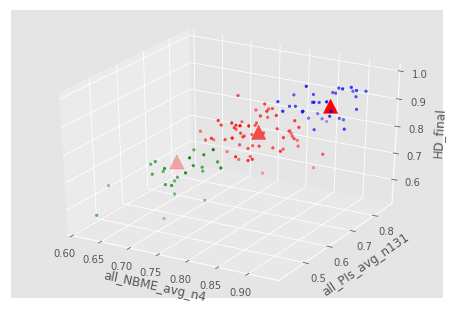

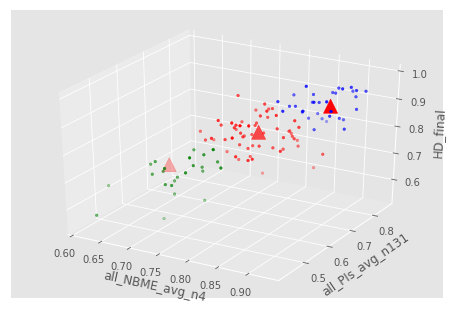

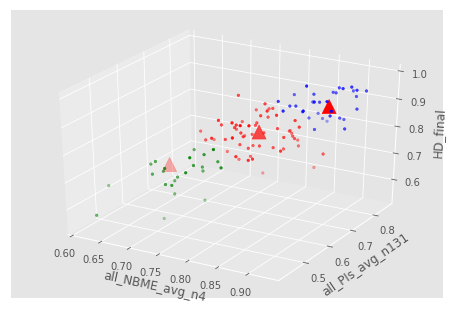

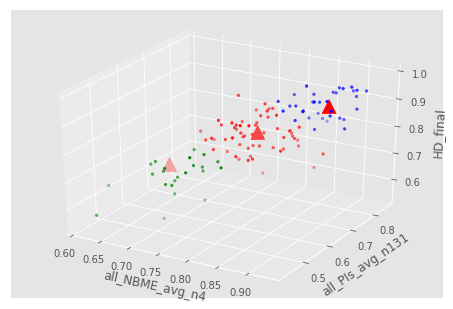

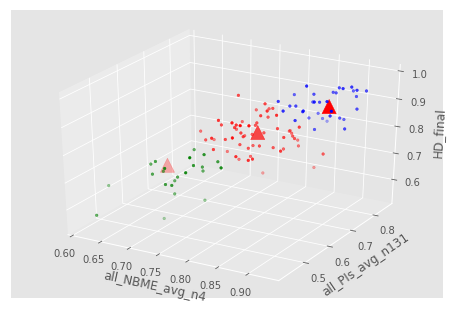

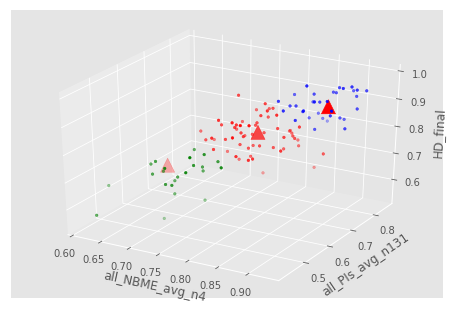

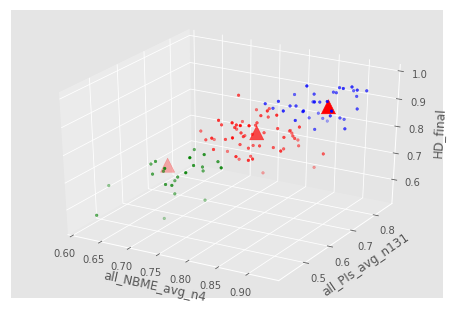

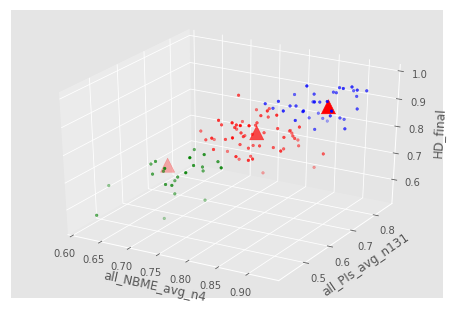

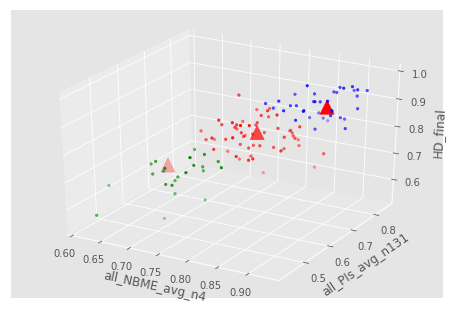

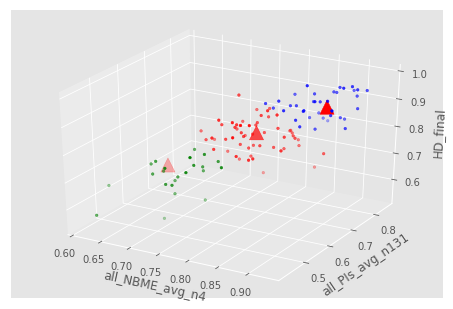

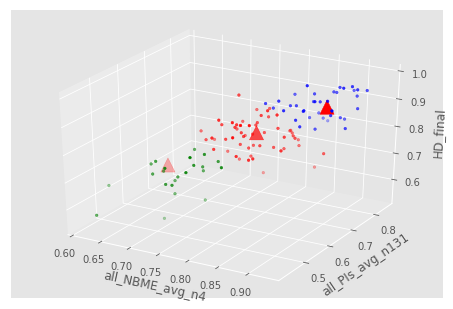

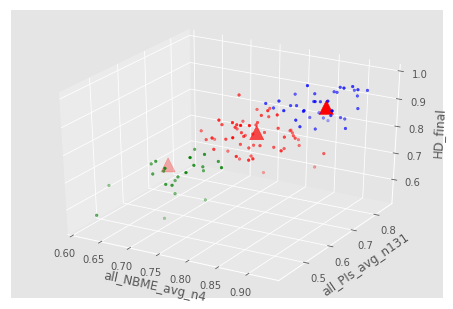

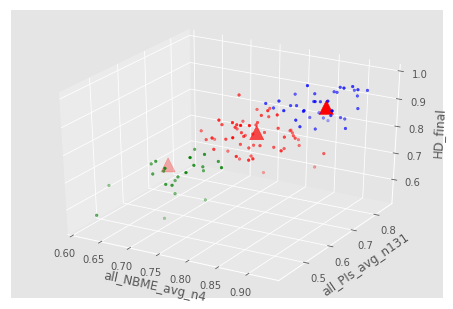

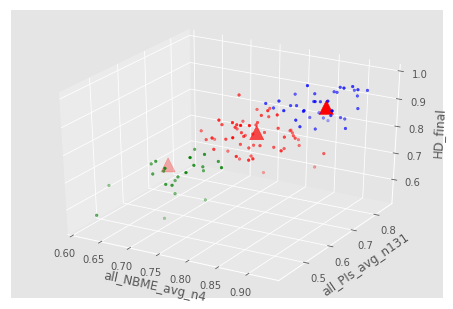

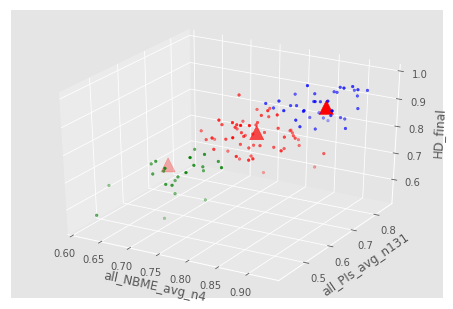

In [8]:

# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
cluster_value=[]
while error!=0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C) # distances from points to clusetr 
        
        #print('distances', distances)
        cluster = np.argmin(distances)# finding min of three clusters 
        
        #print('cluster',cluster)
        clusters[i] = cluster # saving the clusters as 0,1,2
        
        
    cluster_value.append(clusters)
    #print('cluster_value',cluster_value)
    # Storing the old centroid values
    C_old = deepcopy(C) # saving to c_old 
  
    points_list=[]
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        print('points',points)
        
        
        points_list.append(points)
        
      
    
        C[i] = np.mean(points)
        print(' C[i]', C[i])
        error = dist(C, C_old, None)
        
        colors = ['r', 'g', 'b', 'y', 'c', 'm','k','#30a2da','#009E73','#CC79A7']
        #fig, ax = plt.subplots()
        fig = plt.figure()
        ax = Axes3D(fig)
        ax.set_xlabel('all_NBME_avg_n4')
        ax.set_ylabel('all_PIs_avg_n131')
        ax.set_zlabel('HD_final')
        
        for i in range(k):
            points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
            ax.scatter(points[:, 0], points[:, 1],points[:, 2], s=7, c=colors[i])
        ax.scatter(C[:, 0], C[:, 1], C[:, 2] ,marker='^', s=200, c='red')
        
    print('error',error)
    
#print('points_list',points_list)
    
print('The updated clusters are ',C)


In [9]:
print('The updated clusters are C',C)


The updated clusters are C [[0.7592933  0.7592933  0.7592933 ]
 [0.6511087  0.6511087  0.6511087 ]
 [0.84323424 0.84323424 0.84323424]]


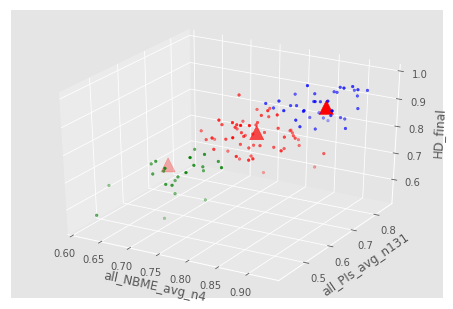

In [10]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
#fig, ax = plt.subplots()
fig = plt.figure()
ax = Axes3D(fig)
#ax.scatter(X[:, 0], X[:, 1], X[:, 2])
ax.set_xlabel('all_NBME_avg_n4')
ax.set_ylabel('all_PIs_avg_n131')
ax.set_zlabel('HD_final')


for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1],points[:, 2], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], C[:, 2] ,marker='^', s=200, c='red')
